# Exercise 03 : Bar charts

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

In [3]:
df = pd.read_sql("""
SELECT timestamp FROM checker WHERE uid LIKE 'user_%'
""",
con)

In [4]:
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weekday'] = df['timestamp'].dt.weekday
df['hour'] = df['timestamp'].dt.hour
df['date'] = df['timestamp'].dt.date

In [6]:
df

,timestamp,weekday,hour,date
0,2020-04-17 05:19:02.744528,4,5,2020-04-17
1,2020-04-17 05:22:35.249331,4,5,2020-04-17
2,2020-04-17 05:22:45.549397,4,5,2020-04-17
3,2020-04-17 05:34:14.691200,4,5,2020-04-17
4,2020-04-17 05:34:24.422370,4,5,2020-04-17
...,...,...,...,...
3202,2020-05-21 20:19:06.872761,3,20,2020-05-21
3203,2020-05-21 20:22:41.785725,3,20,2020-05-21
3204,2020-05-21 20:22:41.877806,3,20,2020-05-21
3205,2020-05-21 20:37:00.129678,3,20,2020-05-21


In [7]:
df['day_type'] = df['weekday'].apply(lambda x: 'working_day' if x < 5 else 'weekend')
df

,timestamp,weekday,hour,date,day_type
0,2020-04-17 05:19:02.744528,4,5,2020-04-17,working_day
1,2020-04-17 05:22:35.249331,4,5,2020-04-17,working_day
2,2020-04-17 05:22:45.549397,4,5,2020-04-17,working_day
3,2020-04-17 05:34:14.691200,4,5,2020-04-17,working_day
4,2020-04-17 05:34:24.422370,4,5,2020-04-17,working_day
...,...,...,...,...,...
3202,2020-05-21 20:19:06.872761,3,20,2020-05-21,working_day
3203,2020-05-21 20:22:41.785725,3,20,2020-05-21,working_day
3204,2020-05-21 20:22:41.877806,3,20,2020-05-21,working_day
3205,2020-05-21 20:37:00.129678,3,20,2020-05-21,working_day


In [8]:
count = df.groupby(['day_type', 'date','hour']).size().reset_index(name='commits')
count

,day_type,date,hour,commits
0,weekend,2020-04-18,7,1
1,weekend,2020-04-18,13,5
2,weekend,2020-04-18,14,3
3,weekend,2020-04-18,15,25
4,weekend,2020-04-18,17,7
...,...,...,...,...
283,working_day,2020-05-21,16,4
284,working_day,2020-05-21,17,1
285,working_day,2020-05-21,18,2
286,working_day,2020-05-21,19,8


In [9]:
avg = count.groupby(['day_type', 'hour'])['commits'].mean().unstack().fillna(0)
avg

hour,0,1,3,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
day_type,,,,,,,,,,,,,,,,,,,,,
weekend,2.0,6.0,1.0,2.0,0.0,4.000000,7.0,3.666667,7.0,23.600000,...,12.428571,14.250000,14.800000,7.142857,9.714286,13.125000,13.000000,10.285714,9.833333,6.4
working_day,3.0,0.0,2.0,7.5,1.5,5.166667,3.7,6.000000,13.2,6.769231,...,10.166667,12.818182,18.888889,16.000000,15.181818,17.833333,14.076923,24.333333,3.750000,5.0


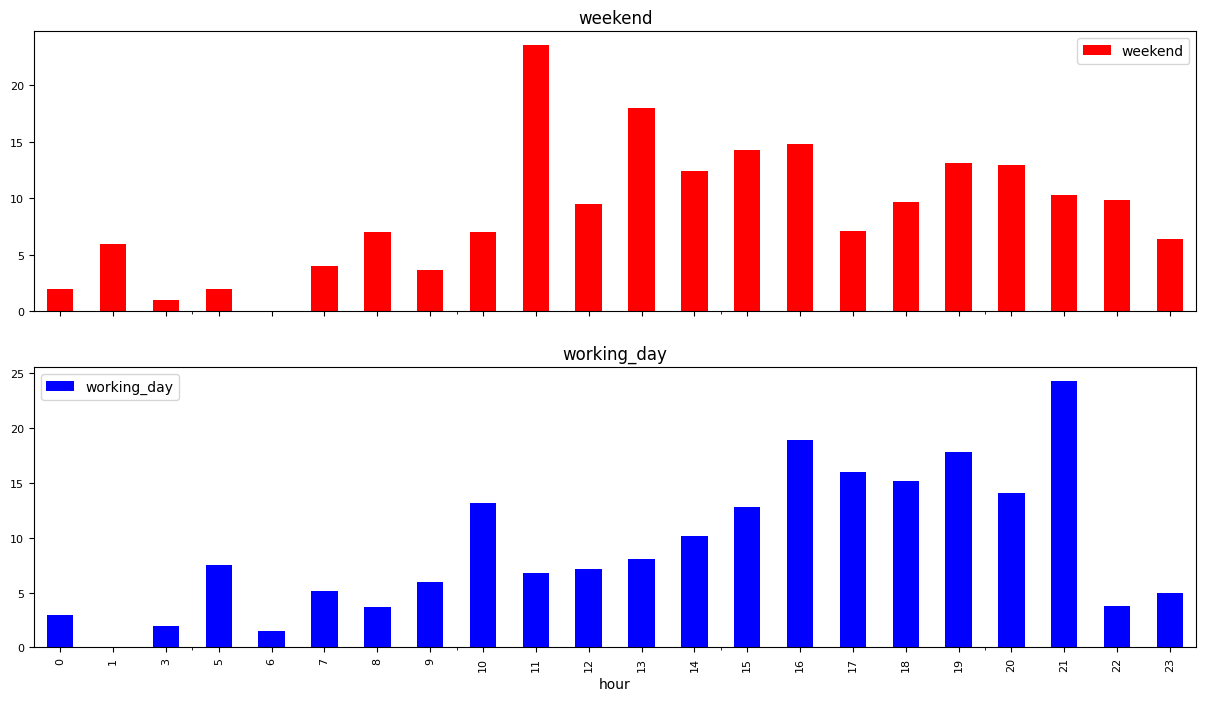

In [10]:
plt = avg.T.plot(
    kind='bar',
    subplots=True,
    layout=(2, 1),
    figsize=(15, 8),
    fontsize=8,
    title=['weekend', 'working_day'],
    color=['red', 'blue']
)

In [11]:
con.close()

* in weekend at 11
* in working day at 21